# Titanic Dataset Investigation

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This notebook describes the data analysis process that I took as I analyzed data from 891 of the 2224 passengers and crew on board of the Titanic.

The Titanic dataset was provided by [Kaggle](https://www.kaggle.com).

## Acquiring

First, I need to import all the libraries and packages that are necessary for this notebook and create a pandas dataframe from the titanic-data.csv file.

In [1]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# file location
dataset = "titanic-data.csv"

# creating a pandas dataframe
titanic_data = pd.read_csv(dataset)

## Cleaning

Now, we have some data but after looking at some of the values carefully I noticed that some of them where missing. Moreover, not all this information is relevant for my analysis. For example, I don't really need the passenger's ID number or their ticket number.

Some of the data is just not represented well. It's better to group age together in different ranges than to have individual ages for the passengers. Lastly, I'm not going to look at the sibling or parent relationship. Instead I'm only concerned whether they have a family member on board or not.

In [3]:
# new column which represents the prescence of family aboard or not
titanic_data['Family'] = (titanic_data['SibSp'] == 1) | (titanic_data['Parch'] == 1)

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# new column which makes age more easy to analyze by grouping it together in ranges
titanic_data['Age_group'] = pd.cut(titanic_data.Age, range(0, 81, 10), right=False, labels=age_labels)

# removing data that will not be used
titanic_data.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age'], axis=1, inplace=True)

I'm still not satisfied yet by how my dataset looks. Some of the columns can have better descriptions and some of the values can be better represented using booleans.

In [59]:
# improving the value types in the 'survived' column
survived_map = {0: False, 1: True}
titanic_data['Survived'] = titanic_data['Survived'].map(survived_map)

# improving the descriptions in the 'Class' column
class_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
titanic_data['Class'] = titanic_data['Pclass'].map(class_map)

# improving the descriptions in the 'Port' column
port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
titanic_data['Port'] = titanic_data['Embarked'].map(port_map)

# removing the Embarked column
titanic_data.drop(['Embarked', 'Pclass'], axis=1, inplace=True)

# Displaying the data
titanic_data.head()

,Survived,Name,Sex,Fare,Family,Age_group,Class,Port
0,False,"Braund, Mr. Owen Harris",male,7.2500,True,20-29,Lower Class,Southampton
1,True,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,True,30-39,Upper Class,Cherbourg
2,True,"Heikkinen, Miss. Laina",female,7.9250,False,20-29,Lower Class,Southampton
3,True,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,True,30-39,Upper Class,Southampton
4,False,"Allen, Mr. William Henry",male,8.0500,False,30-39,Lower Class,Southampton


## Exploring

Now that the dataset is looks better I can start exploring and learning from it. I'm concerned with the factors that made people more likely to survive the sinking of the Titanic. For now, let's just find the number of survivors from the 891 passengers and it's frequency.

In [60]:
# number of passengers in the dataset
number_of_passengers = len(titanic_data)

# number_of_survivors
number_of_survivors = (titanic_data['Survived']).sum()

# survival probability
survival_probability = number_of_survivors / number_of_passengers

print("Total number of passengers: " + str(number_of_passengers))
print("Total survivors: " + str(number_of_survivors))
print("Probability of survival: " + str(round(survival_probability, 2)))

Total number of passengers: 891
Total survivors: 342
Probability of survival: 0.38


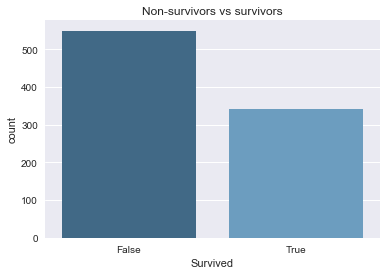

In [61]:
plot = sns.countplot(data=titanic_data, x="Survived", palette="Blues_d")
plot.set_title("Non-survivors vs survivors")
plt.show()

### Survival and gender

When the Titanic sank, the safety of women and children came first. My guess is that their is a higher ratio of women how survived than men.

In [62]:
# number of men on board of the Titanic
number_of_men = (titanic_data['Sex'] == 'male').sum()

# number of women on board of the Titanic
number_of_women = (titanic_data['Sex'] == 'female').sum()

print("Number of men: " + str(number_of_men))
print("Number of women: " + str(number_of_women))

Number of men: 577
Number of women: 314


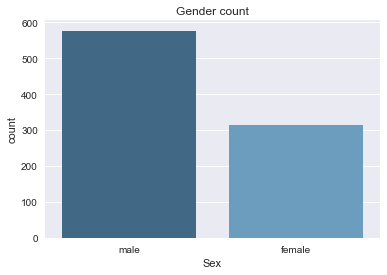

In [63]:
plot = sns.countplot(data=titanic_data, x="Sex", palette="Blues_d")
plot.set_title("Gender count")
plt.show()

In [64]:
# group the data by gender
gender_vs_survival = titanic_data.groupby(['Survived', 'Sex']).size()

# number of men who survived and did not survived
men_survived = gender_vs_survival[True, 'male']
men_not_survived = gender_vs_survival[False, 'male']

# number of women who survived and did not survived
women_survived = gender_vs_survival[True, 'female']
women_not_survived = gender_vs_survival[False, 'female']

# survival percentages
survival_probability_for_men = round(men_survived / number_of_men, 3)
survival_probability_for_women = round(women_survived / number_of_women, 3)

print("Number of men who survived: " + str(men_survived))
print("Number of women who survived: " + str(women_survived) + "\n")
print("Probability of surviving as a men: " + str(survival_probability_for_men))
print("Probability of surviving as a woman: " + str(survival_probability_for_women))

Number of men who survived: 109
Number of women who survived: 233

Probability of surviving as a men: 0.189
Probability of surviving as a woman: 0.742


As we can see, women were much more likely to survive the tragedy than men. 74% of the woman abort survived while only a mere 19% of the man did.

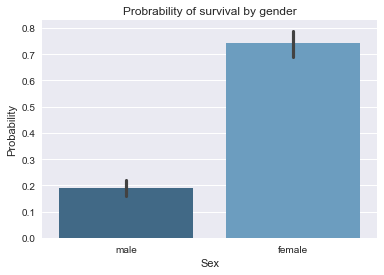

In [65]:
plot = sns.barplot(data=titanic_data, x="Sex", y="Survived", palette="Blues_d", estimator= lambda x: sum(x) / len(x))
plot.set_title("Probrability of survival by gender")
plot.set(ylabel="Probability")
plt.show()

### Survival and age

Based on my previous hypothesis, I also expect to see I higher rate of children who survived the tragedy.

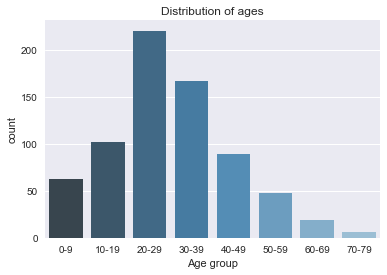

In [66]:
# Distribution of age by groups
distribution_of_ages = sns.countplot(x="Age_group", data=titanic_data, palette="Blues_d")
distribution_of_ages.set_title("Distribution of ages")
distribution_of_ages.set(xlabel="Age group")
plt.show(distribution_of_ages)

As we can see from the bar plot, the shape of the age distribution is normal and most of the passengers were between 10 and 49 years. I'm going to count as a children anyone younger than 9 years old.

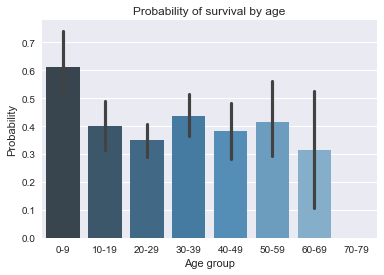

In [67]:
age_vs_survival = titanic_data.groupby(['Survived', 'Age_group']).size()

# probability_of_survival_by_age
probability_of_survival_by_age = sns.barplot(x="Age_group", y="Survived", data=titanic_data, palette="Blues_d", estimator=lambda x: sum(x) / len(x))
probability_of_survival_by_age.set_title("Probability of survival by age")
probability_of_survival_by_age.set(xlabel="Age group")
probability_of_survival_by_age.set(ylabel="Probability")
plt.show(probability_of_survival_by_age)

The plot above reveals that children of ages 0-9 were the most likely to survive the tragedy. A saddening insight that also shows from this plot is that no one from the 6 passengers of ages 70-79 survived. Apart from the edge cases of very young and elderly passengers, the probability of survival doesn't seem to change much. It's almost as likely for someone of age 10-19 to survive as it is for someone of age 50-59.

### Survival and social class

In the 1997 movie by James Cameron, we meet the fictional character Caledon Hockley who is played by Billy Zane. Hockley is the son of a successful steel tycoon and is able to pay for the whole trip as first class passengers due to his high wealth and social position. When the Titanic is sinking, he tries to pay his way into a lifeboat but the emergency personnel tells him "your money can't save you any more than it could save me" and stops him from boarding the boat. 

This is an interesting example because it means that the crew was following the "women and children only" rule and that no matter your wealth or social class you had the same chance of survival as anyone else. Nevertheless, this was in a movie and it will be interesting to see if it hold with real data.

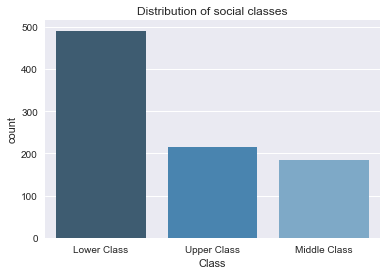

In [73]:
# Distribution of social classes
distribution_of_class = sns.countplot(x="Class", data=titanic_data, palette="Blues_d")
distribution_of_class.set_title("Distribution of social classes")
plt.show(distribution_of_class)

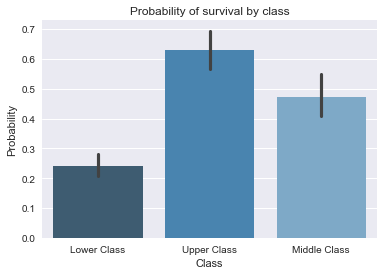

In [76]:
class_vs_survival = titanic_data.groupby(['Survived', 'Class']).size()

# probability of survival by class
probability_of_survival_by_class = sns.barplot(x="Class", y="Survived", data=titanic_data, palette="Blues_d", estimator=lambda x: sum(x) / len(x))
probability_of_survival_by_class.set_title("Probability of survival by class")
probability_of_survival_by_class.set(xlabel="Class")
probability_of_survival_by_class.set(ylabel="Probability")
plt.show(probability_of_survival_by_class)

Even though our character Hockley wasn't able to pay his way into the lifeboat (although got in the boat anyways later on), it appears that social class was a big determinant of the likehood of survival. Uperclass passengers had a survival probability of 0.63 while lower class passenger only had a probability of 0.24.